# <span style='font-family:"Times New Roman"'> <span styel=''> **>1muts SUBGROUP EXPLORATION**

 <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
     
*March 2020*

**Goal:** In this notebook, we want to understand why the >1muts subgroup has a very different overall number of mutations and a different distribution of mutation Type. For that we will distinguish between the different cancer Type and try categorizing on the clonality of the samples.
    
The Notebook is divided in X parts:
   


**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [6]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math
warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display

from itertools import cycle, islice

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---

In [3]:
# Loading the master
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
master_sub = master[master['tp53_group'] == '>1muts']
master_sub

,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Cancer_Type_Detailed,Sample_Type,purity,ploidy,samples_per_patient,Overall Survival Status,Overall Survival (Months),MSI Score,TMB_Score,tp53_key_1,tp53_vc_1,tp53_ccf_1,tp53_vaf_1,tp53_HGVSp_1,tp53_spot_1,tp53_key_2,tp53_vc_2,tp53_ccf_2,tp53_vaf_2,tp53_HGVSp_2,tp53_spot_2,tp53_key_3,tp53_vc_3,tp53_ccf_3,tp53_vaf_3,tp53_HGVSp_3,tp53_spot_3,tp53_key_4,tp53_vc_4,tp53_ccf_4,tp53_vaf_4,tp53_HGVSp_4,tp53_spot_4,tp53_key_5,tp53_vc_5,tp53_ccf_5,tp53_vaf_5,tp53_HGVSp_5,tp53_spot_5,tp53_count,tp53_tcn,tp53_mcn,tp53_lcn,tp53_seg_length,tp53_cn_state,cf,wgd,mutation_count,gene_count,max_vaf,tp53_exp_nb_1,tp53_exp_nb_2,tp53_exp_nb_3,tp53_exp_nb_4,tp53_exp_nb_5,tp53_first_group,tp53_group,chr_affected,chr_loss,chr_gain,chr_cnloh,frac_genome_altered,tp53_vc_group_1,tp53_vc_group_2,tp53_vc_group_3,tp53_vc_group_4,tp53_vc_group_5
109,P-0022536-T01-IM6_P-0022536-N01-IM6,P-0022536-T01-IM6,P-0022536,Glioma,Glioblastoma Multiforme,Metastasis,0.621794,1.964867,1.0,DECEASED,3.255,0.14,4.4,P-0022536-T01-IM6_17_7577094_G_A,Missense_Mutation,0.961,0.298893,p.Arg282Trp,282,P-0022536-T01-IM6_17_7577120_C_T,Missense_Mutation,1.000,0.314172,p.Arg273His,273,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668564.0,DIPLOID,1.0,-1.0,5,4.0,0.337368,0.961389,1.010535,NaN,NaN,NaN,WILD_TYPE,>1muts,5,4,1,0,0.176,missense,missense,None,None,None
115,P-0001253-T01-IM3_P-0001253-N01-IM3,P-0001253-T01-IM3,P-0001253,Glioma,Glioblastoma Multiforme,Primary,0.945316,3.473627,1.0,LIVING,65.096,0.78,4.5,P-0001253-T01-IM3_17_7577544_A_G,Missense_Mutation,0.899,0.424779,p.Met246Thr,246,P-0001253-T01-IM3_17_7577570_C_A,Missense_Mutation,0.844,0.399038,p.Met237Ile,237,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,41161397.0,DOUBLE LOSS AFTER,1.0,1.0,5,4.0,0.424779,0.898702,0.844243,NaN,NaN,NaN,DOUBLE LOSS AFTER,>1muts,20,2,19,1,0.990,missense,missense,None,None,None
229,P-0006754-T01-IM5_P-0006754-N01-IM5,P-0006754-T01-IM5,P-0006754,"Skin Cancer, Non-Melanoma",Cutaneous Squamous Cell Carcinoma,Metastasis,0.207614,1.894433,1.0,DECEASED,18.016,0.15,64.9,P-0006754-T01-IM5_17_7577539_G_A,Missense_Mutation,0.567,0.058875,p.Arg248Trp,248,P-0006754-T01-IM5_17_7579414_CC_TT,Nonsense_Mutation,1.000,0.104612,p.Trp91Ter,91,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668459.0,DIPLOID,1.0,-1.0,67,56.0,0.189802,0.567161,1.007756,NaN,NaN,NaN,WILD_TYPE,>1muts,5,5,0,1,0.216,missense,truncated,None,None,None
268,P-0028367-T01-IM6_P-0028367-N01-IM6,P-0028367-T01-IM6,P-0028367,Head and Neck Cancer,Oral Cavity Squamous Cell Carcinoma,Primary,0.468725,1.896462,1.0,LIVING,23.573,0.36,8.8,P-0028367-T01-IM6_17_7578181_G_A,Missense_Mutation,0.989,0.231844,p.Pro223Leu,223,P-0028367-T01-IM6_17_7579378_G_C,Nonsense_Mutation,1.000,0.253644,p.Tyr103Ter,103,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,38397131.0,DIPLOID,1.0,-1.0,11,10.0,0.479381,0.989252,1.082273,NaN,NaN,NaN,WILD_TYPE,>1muts,2,1,1,0,0.098,missense,truncated,None,None,None
298,P-0013783-T01-IM5_P-0013783-N01-IM5,P-0013783-T01-IM5,P-0013783,Glioma,Glioblastoma Multiforme,Primary,0.933909,2.828483,1.0,LIVING,18.937,0.67,8.9,P-0013783-T01-IM5_17_7578406_C_T,Missense_Mutation,1.000,0.494505,p.Arg175His,175,P-0013783-T01-IM5_17_7579328_T_-,Frame_Shift_Del,0.988,0.461538,p.Lys120SerfsTer3,120,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668431.0,DOUBLE LOSS AFTER,1.0,1.0,9,6.0,0.940000,1.059001,0.988401,NaN,NaN,NaN,DOUBLE LOSS AFTER,>1muts,19,11,8,1,0.992,missense,truncated,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [4]:
print('Number of samples in the subgroup: ' + str(len(master_sub)))

Number of samples in the subgroup: 697


# Distribution per Cancer Type

,count
Cancer_Type,
Colorectal Cancer,116
Non-Small Cell Lung Cancer,110
Glioma,101
Bladder Cancer,60
"Skin Cancer, Non-Melanoma",44
Cancer of Unknown Primary,43
Head and Neck Cancer,39
Endometrial Cancer,35
Esophagogastric Cancer,28


(<Figure size 1000x1000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x135051c10>)

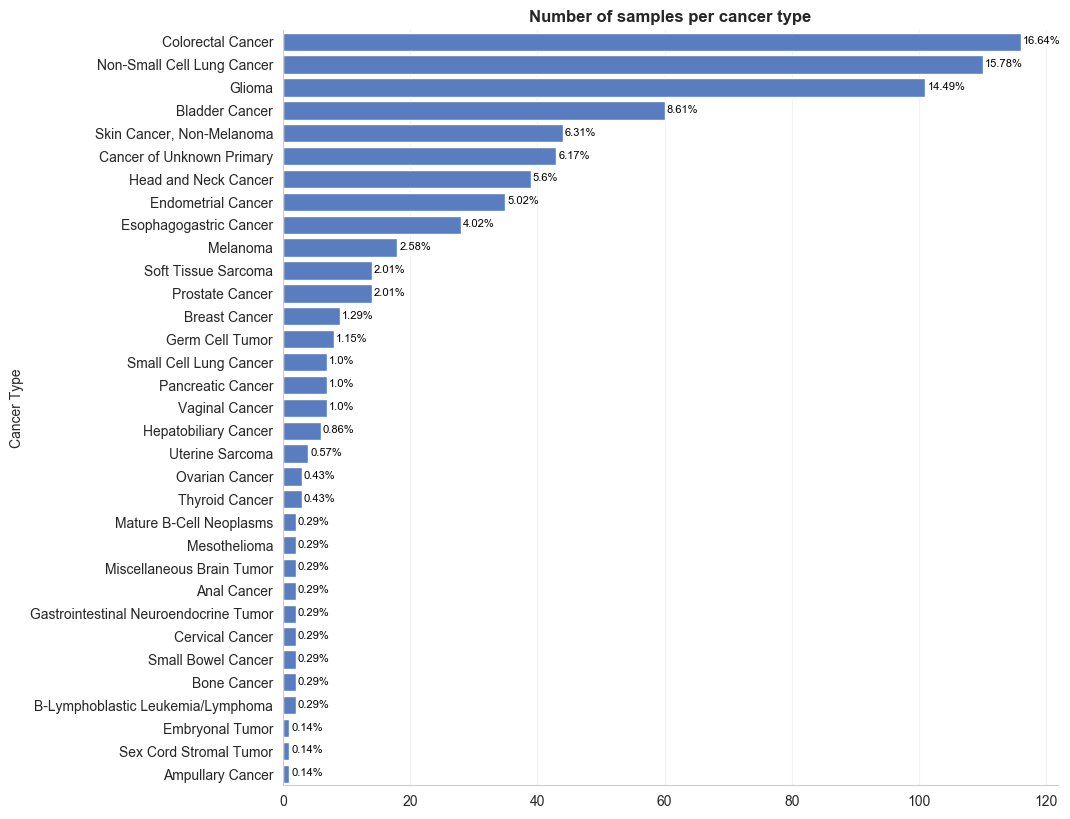

In [5]:
count = pd.DataFrame(pd.DataFrame(master_sub[['Cancer_Type']].groupby(['Cancer_Type']).size(), columns=['count']))
count = count[count['count']>=0]

count = count.sort_values(by=['count'], ascending=False)
display(count)

# We plot the table
get_ploth(count.index, 'count', count, 'Cancer Type', '','Number of samples per cancer type',figsize=(10,10), perc=True)

## Categorizing based on the clonality

In [9]:
data_ccf = master_sub[['tp53_ccf_1', 'tp53_ccf_2', 'tp53_ccf_3', 'tp53_ccf_4', 'tp53_ccf_5']]
max_table_ccf = pd.DataFrame(np.sort(data_ccf.fillna(0).values)[:, -2:],
                             columns=['ccf_2nd-largest', 'ccf_largest'])
max_table_ccf = pd.concat([max_table_ccf, master_sub.reset_index()], axis=1)

display(max_table_ccf)


def clonal_cond(x, thr_1, thr_2):
    if x.ccf_largest + x['ccf_2nd-largest'] > thr_1:
        return 'clonal'
    if x.ccf_largest + x['ccf_2nd-largest'] > thr_2:
        return 'intermediate'
    else:
        return 'subclonal'


max_table_ccf['clonality'] = max_table_ccf.apply(clonal_cond,
                                                 args=(1.8, 1.2),
                                                 axis=1)

get_groupby(max_table_ccf, 'clonality', 'count')

,ccf_2nd-largest,ccf_largest,index,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Cancer_Type_Detailed,Sample_Type,purity,ploidy,samples_per_patient,Overall Survival Status,Overall Survival (Months),MSI Score,TMB_Score,tp53_key_1,tp53_vc_1,tp53_ccf_1,tp53_vaf_1,tp53_HGVSp_1,tp53_spot_1,tp53_key_2,tp53_vc_2,tp53_ccf_2,tp53_vaf_2,tp53_HGVSp_2,tp53_spot_2,tp53_key_3,tp53_vc_3,tp53_ccf_3,tp53_vaf_3,tp53_HGVSp_3,tp53_spot_3,tp53_key_4,tp53_vc_4,tp53_ccf_4,tp53_vaf_4,tp53_HGVSp_4,tp53_spot_4,tp53_key_5,tp53_vc_5,tp53_ccf_5,tp53_vaf_5,tp53_HGVSp_5,tp53_spot_5,tp53_count,tp53_tcn,tp53_mcn,tp53_lcn,tp53_seg_length,tp53_cn_state,cf,wgd,mutation_count,gene_count,max_vaf,tp53_exp_nb_1,tp53_exp_nb_2,tp53_exp_nb_3,tp53_exp_nb_4,tp53_exp_nb_5,tp53_first_group,tp53_group,chr_affected,chr_loss,chr_gain,chr_cnloh,frac_genome_altered,tp53_vc_group_1,tp53_vc_group_2,tp53_vc_group_3,tp53_vc_group_4,tp53_vc_group_5
0,0.961,1.000,109,P-0022536-T01-IM6_P-0022536-N01-IM6,P-0022536-T01-IM6,P-0022536,Glioma,Glioblastoma Multiforme,Metastasis,0.621794,1.964867,1.0,DECEASED,3.255,0.14,4.4,P-0022536-T01-IM6_17_7577094_G_A,Missense_Mutation,0.961,0.298893,p.Arg282Trp,282,P-0022536-T01-IM6_17_7577120_C_T,Missense_Mutation,1.000,0.314172,p.Arg273His,273,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668564.0,DIPLOID,1.0,-1.0,5,4.0,0.337368,0.961389,1.010535,NaN,NaN,NaN,WILD_TYPE,>1muts,5,4,1,0,0.176,missense,missense,None,None,None
1,0.844,0.899,115,P-0001253-T01-IM3_P-0001253-N01-IM3,P-0001253-T01-IM3,P-0001253,Glioma,Glioblastoma Multiforme,Primary,0.945316,3.473627,1.0,LIVING,65.096,0.78,4.5,P-0001253-T01-IM3_17_7577544_A_G,Missense_Mutation,0.899,0.424779,p.Met246Thr,246,P-0001253-T01-IM3_17_7577570_C_A,Missense_Mutation,0.844,0.399038,p.Met237Ile,237,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,41161397.0,DOUBLE LOSS AFTER,1.0,1.0,5,4.0,0.424779,0.898702,0.844243,NaN,NaN,NaN,DOUBLE LOSS AFTER,>1muts,20,2,19,1,0.990,missense,missense,None,None,None
2,0.567,1.000,229,P-0006754-T01-IM5_P-0006754-N01-IM5,P-0006754-T01-IM5,P-0006754,"Skin Cancer, Non-Melanoma",Cutaneous Squamous Cell Carcinoma,Metastasis,0.207614,1.894433,1.0,DECEASED,18.016,0.15,64.9,P-0006754-T01-IM5_17_7577539_G_A,Missense_Mutation,0.567,0.058875,p.Arg248Trp,248,P-0006754-T01-IM5_17_7579414_CC_TT,Nonsense_Mutation,1.000,0.104612,p.Trp91Ter,91,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668459.0,DIPLOID,1.0,-1.0,67,56.0,0.189802,0.567161,1.007756,NaN,NaN,NaN,WILD_TYPE,>1muts,5,5,0,1,0.216,missense,truncated,None,None,None
3,0.989,1.000,268,P-0028367-T01-IM6_P-0028367-N01-IM6,P-0028367-T01-IM6,P-0028367,Head and Neck Cancer,Oral Cavity Squamous Cell Carcinoma,Primary,0.468725,1.896462,1.0,LIVING,23.573,0.36,8.8,P-0028367-T01-IM6_17_7578181_G_A,Missense_Mutation,0.989,0.231844,p.Pro223Leu,223,P-0028367-T01-IM6_17_7579378_G_C,Nonsense_Mutation,1.000,0.253644,p.Tyr103Ter,103,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,38397131.0,DIPLOID,1.0,-1.0,11,10.0,0.479381,0.989252,1.082273,NaN,NaN,NaN,WILD_TYPE,>1muts,2,1,1,0,0.098,missense,truncated,None,None,None
4,0.988,1.000,298,P-0013783-T01-IM5_P-0013783-N01-IM5,P-0013783-T01-IM5,P-0013783,Glioma,Glioblastoma Multiforme,Primary,0.933909,2.828483,1.0,LIVING,18.937,0.67,8.9,P-0013783-T01-IM5_17_7578406_C_T,Missense_Mutation,1.000,0.494505,p.Arg175His,175,P-0013783-T01-IM5_17_7579328_T_-,Frame_Shift_Del,0.988,0.461538,p.Lys120SerfsTer3,120,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,2,2.0,1.0,1.0,80668431.0,DOUBLE LOSS AFTER,1.0,1.0,9,6.0,0.940000,1.059001,0.988401,NaN,NaN,NaN,DOUBLE LOSS AFTER,>1muts,19,11,8,1,0.992,missense,truncated,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

,count
clonality,
clonal,345
intermediate,276
subclonal,76


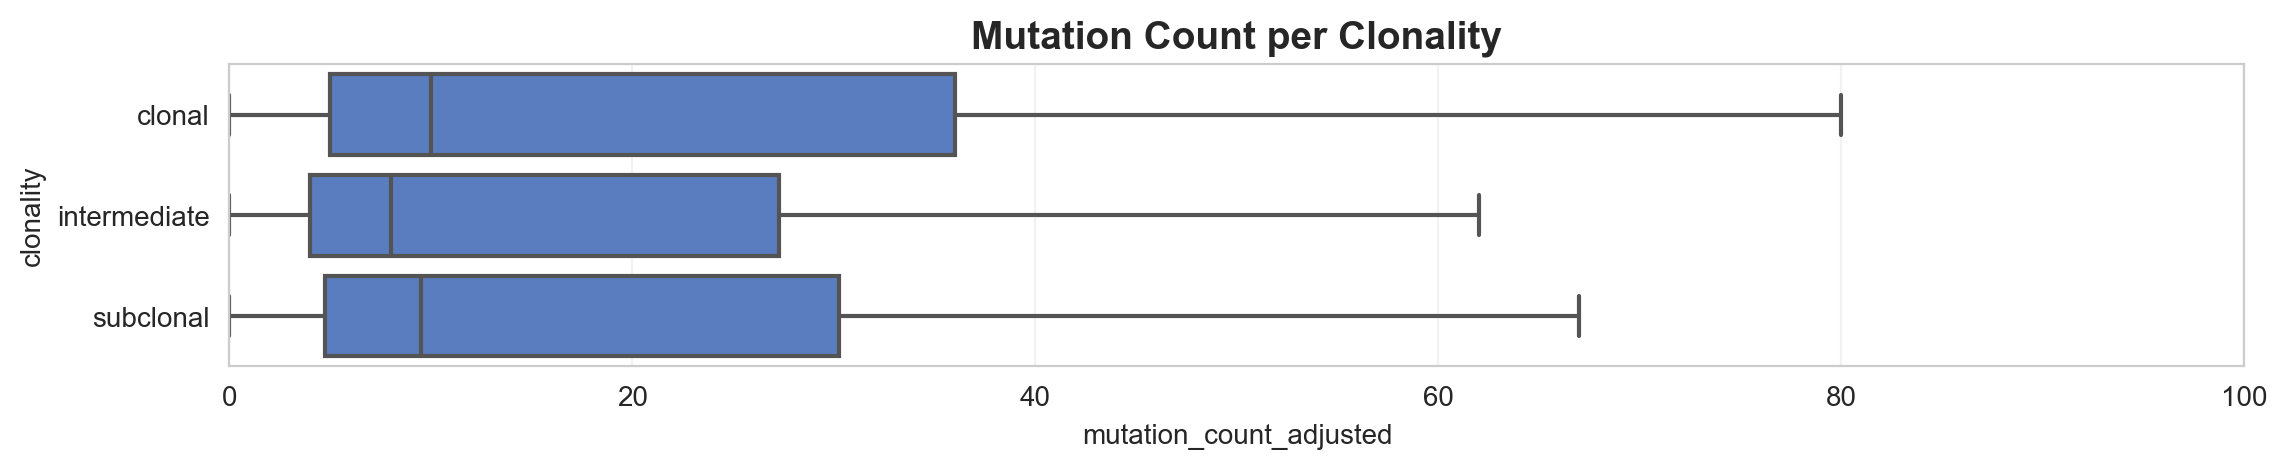

In [10]:
fig=plt.figure(figsize=(13,2))
ax1 = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)
ax1.set_xlim(0, 100)

data = max_table_ccf[['tp53_count', 'clonality', 'mutation_count','gene_count']]
data['mutation_count_adjusted'] = data['mutation_count'] - data['tp53_count']

sns.boxplot(y="clonality", x="mutation_count_adjusted",data=data,ax=ax1, dodge=False, color=list(sns.color_palette("muted"))[0]).set_title('Mutation Count per Clonality', weight='bold', fontsize=14)

for i,artist in enumerate(ax1.artists):
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax1.lines[j]
        line.set_mfc('None')
        line.set_mec('None')

## Mutation count per Cancer Type

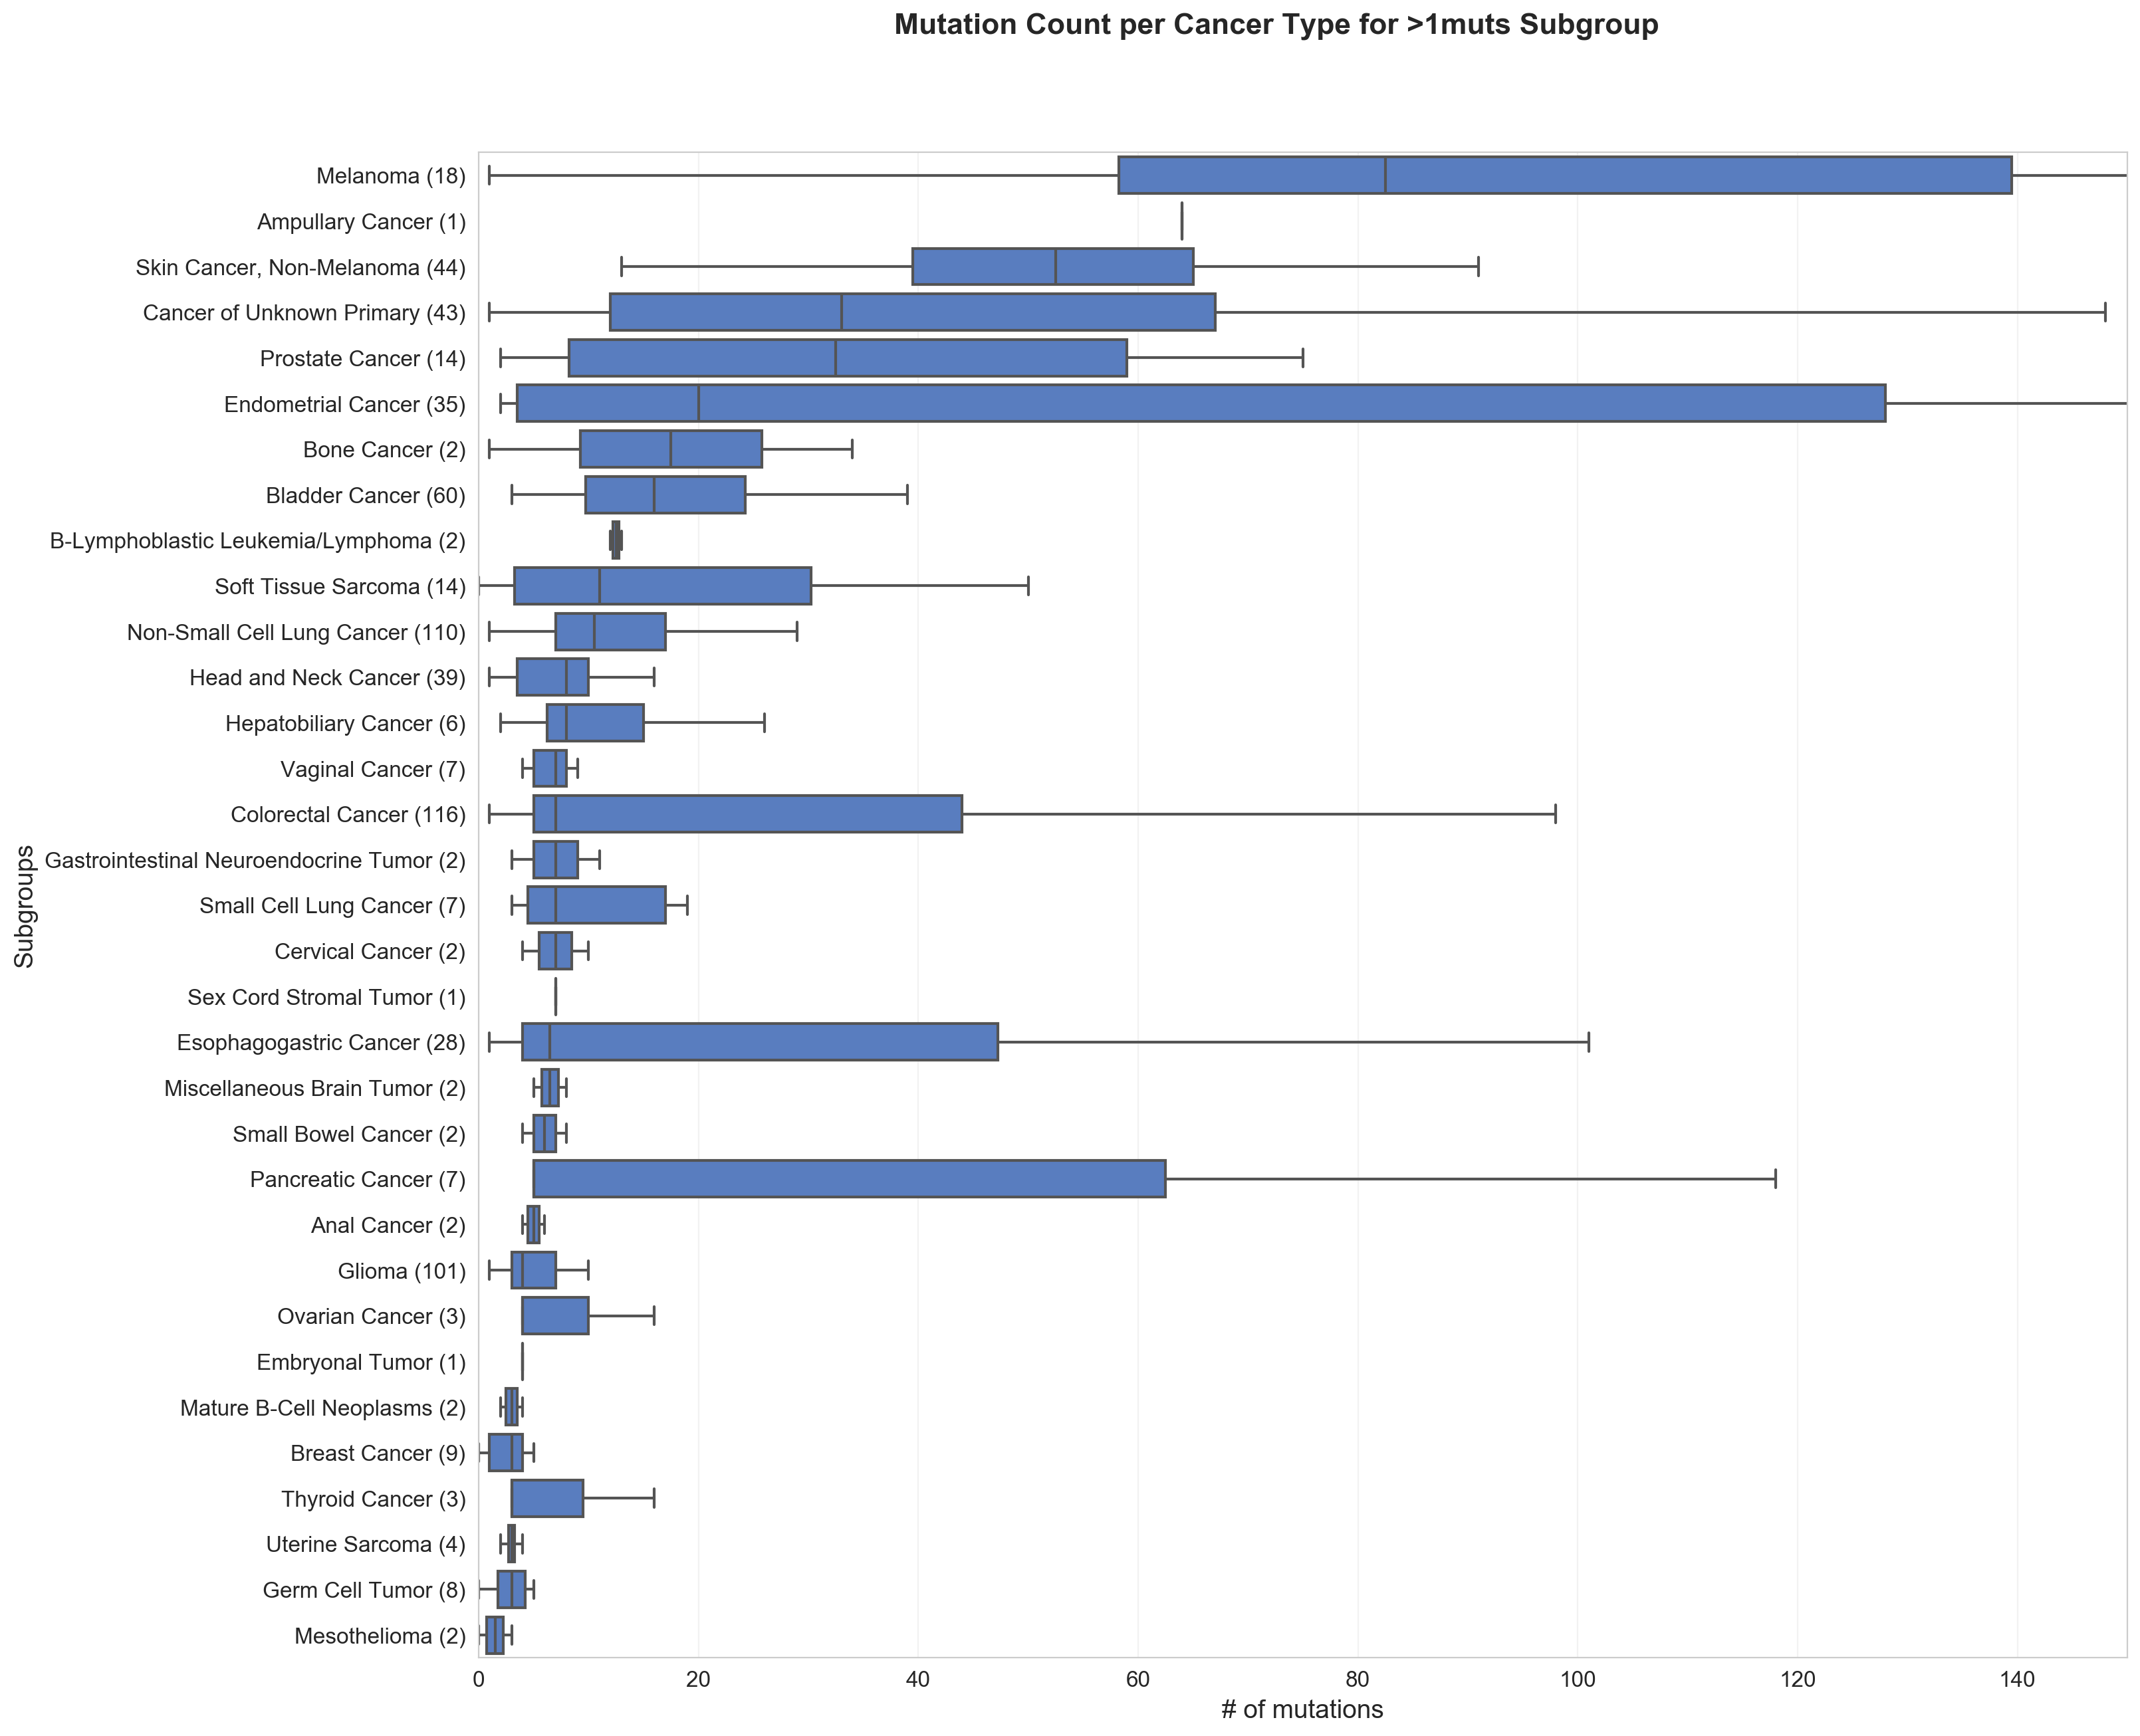

In [11]:
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Mutation Count per Cancer Type for >1muts Subgroup',
             fontsize=16,
             weight='bold',
             y=0.95)
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
ax1.set_xlim(0, 150)

master_sub['mutation_count_adjusted'] = master_sub[
    'mutation_count'] - master_sub['tp53_count']

# To sort in decreasing median order
result = master_sub.groupby(
    ["Cancer_Type"])['mutation_count_adjusted'].aggregate(
        np.median).reset_index().sort_values('mutation_count_adjusted',
                                             ascending=False)
# To have the numbers per cancer_type
h = get_groupby(master_sub, 'Cancer_Type', 'count')
numbers = []
for cancer in list(result.Cancer_Type):
    numbers.append(int(h[h.index == cancer]['count']))
cancer_number = [
    i + ' (' + str(j) + ')' for i, j in zip(list(result.Cancer_Type), numbers)
]

sns.boxplot(y="Cancer_Type",
            x="mutation_count_adjusted",
            data=master_sub,
            ax=ax1,
            dodge=False,
            color=list(sns.color_palette("muted"))[0],
            order=result['Cancer_Type']).set(xlabel='Mutation Count',
                                             ylabel='Subgroups')

for i, artist in enumerate(ax1.artists):
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i * 6, i * 6 + 6):
        line = ax1.lines[j]
        line.set_mfc('None')
        line.set_mec('None')
ax1.set_yticklabels(cancer_number, fontsize=12)
ax1.set_xticklabels([0, 20, 40, 60, 80, 100, 120, 140], fontsize=12)
ax1.set_ylabel('Subgroups', fontsize=14)
ax1.set_xlabel('# of mutations', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Mutation Count per Cancer Type')

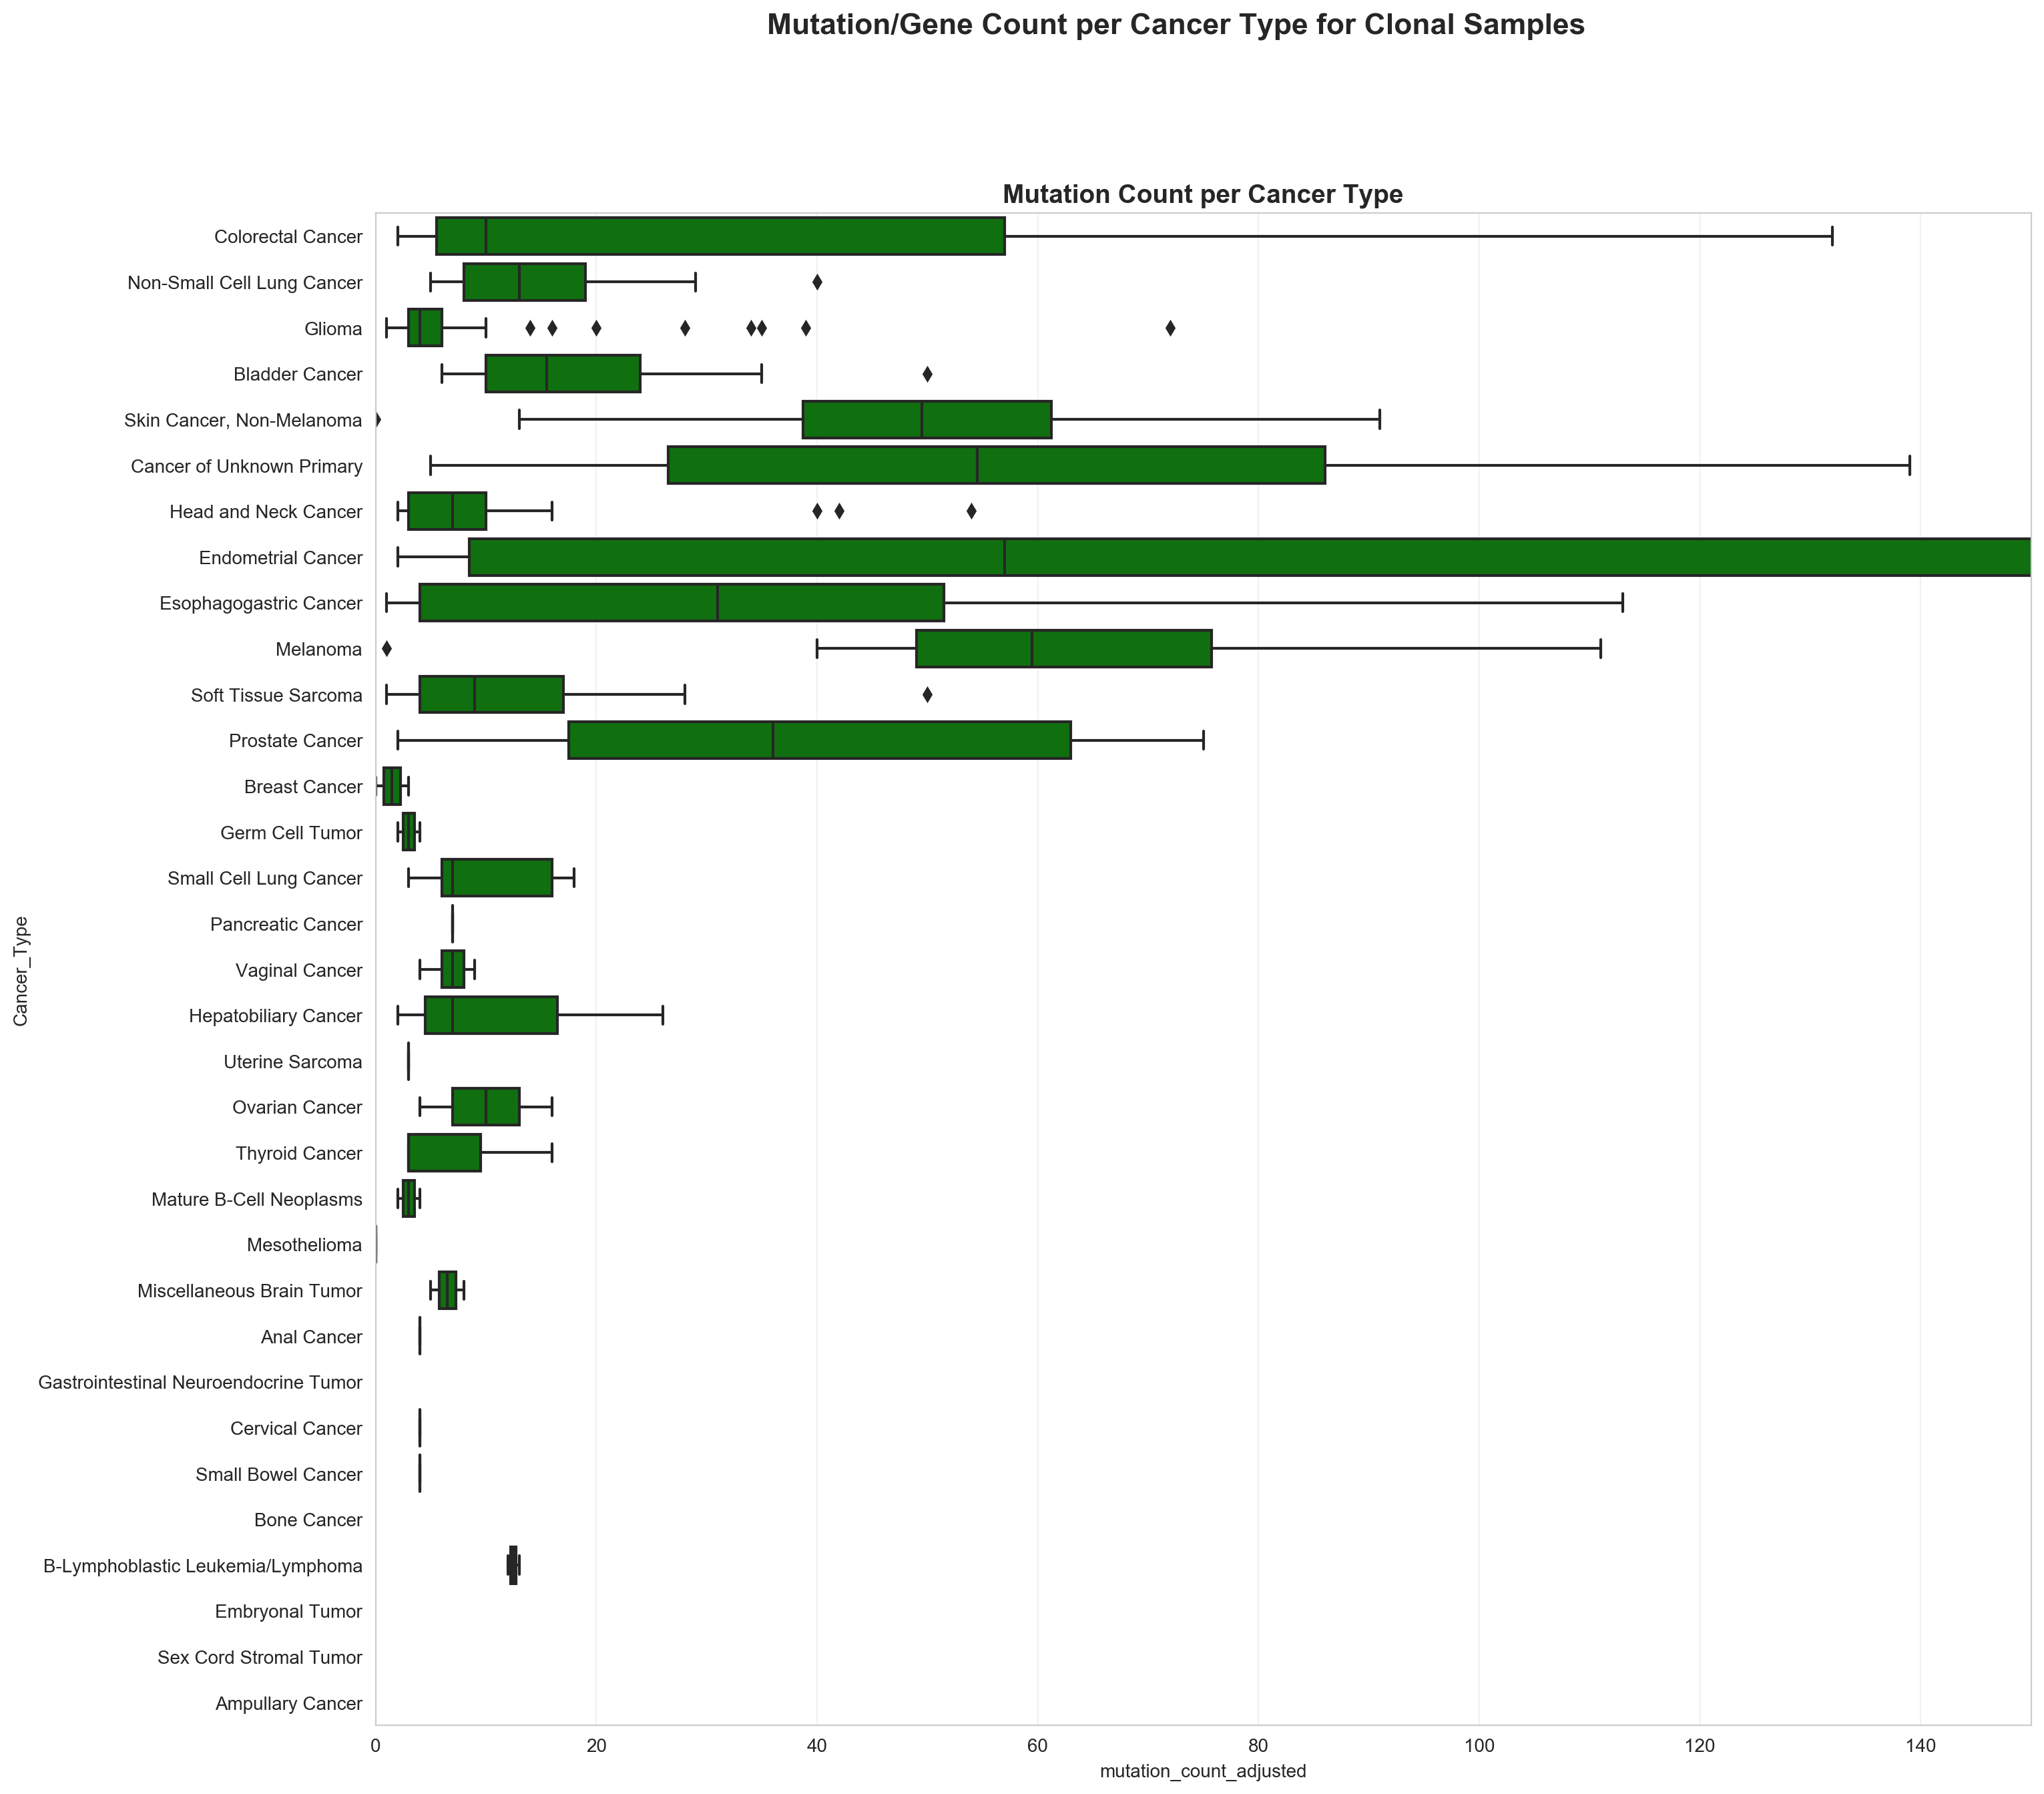

In [12]:
# For clonal Samples
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Mutation/Gene Count per Cancer Type for Clonal Samples',
             fontsize=16,
             weight='bold')
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
ax1.set_xlim(0, 150)

max_table_ccf['mutation_count_adjusted'] = max_table_ccf[
    'mutation_count'] - max_table_ccf['tp53_count']
max_table_ccf_clonal = max_table_ccf[max_table_ccf['clonality'] == 'clonal']

sns.boxplot(y="Cancer_Type",
            x="mutation_count_adjusted",
            data=max_table_ccf_clonal,
            ax=ax1,
            dodge=False,
            color='green',
            order=count.index).set_title('Mutation Count per Cancer Type',
                                         weight='bold',
                                         fontsize=14)

Text(0.5, 1.0, 'Mutation Count per Cancer Type')

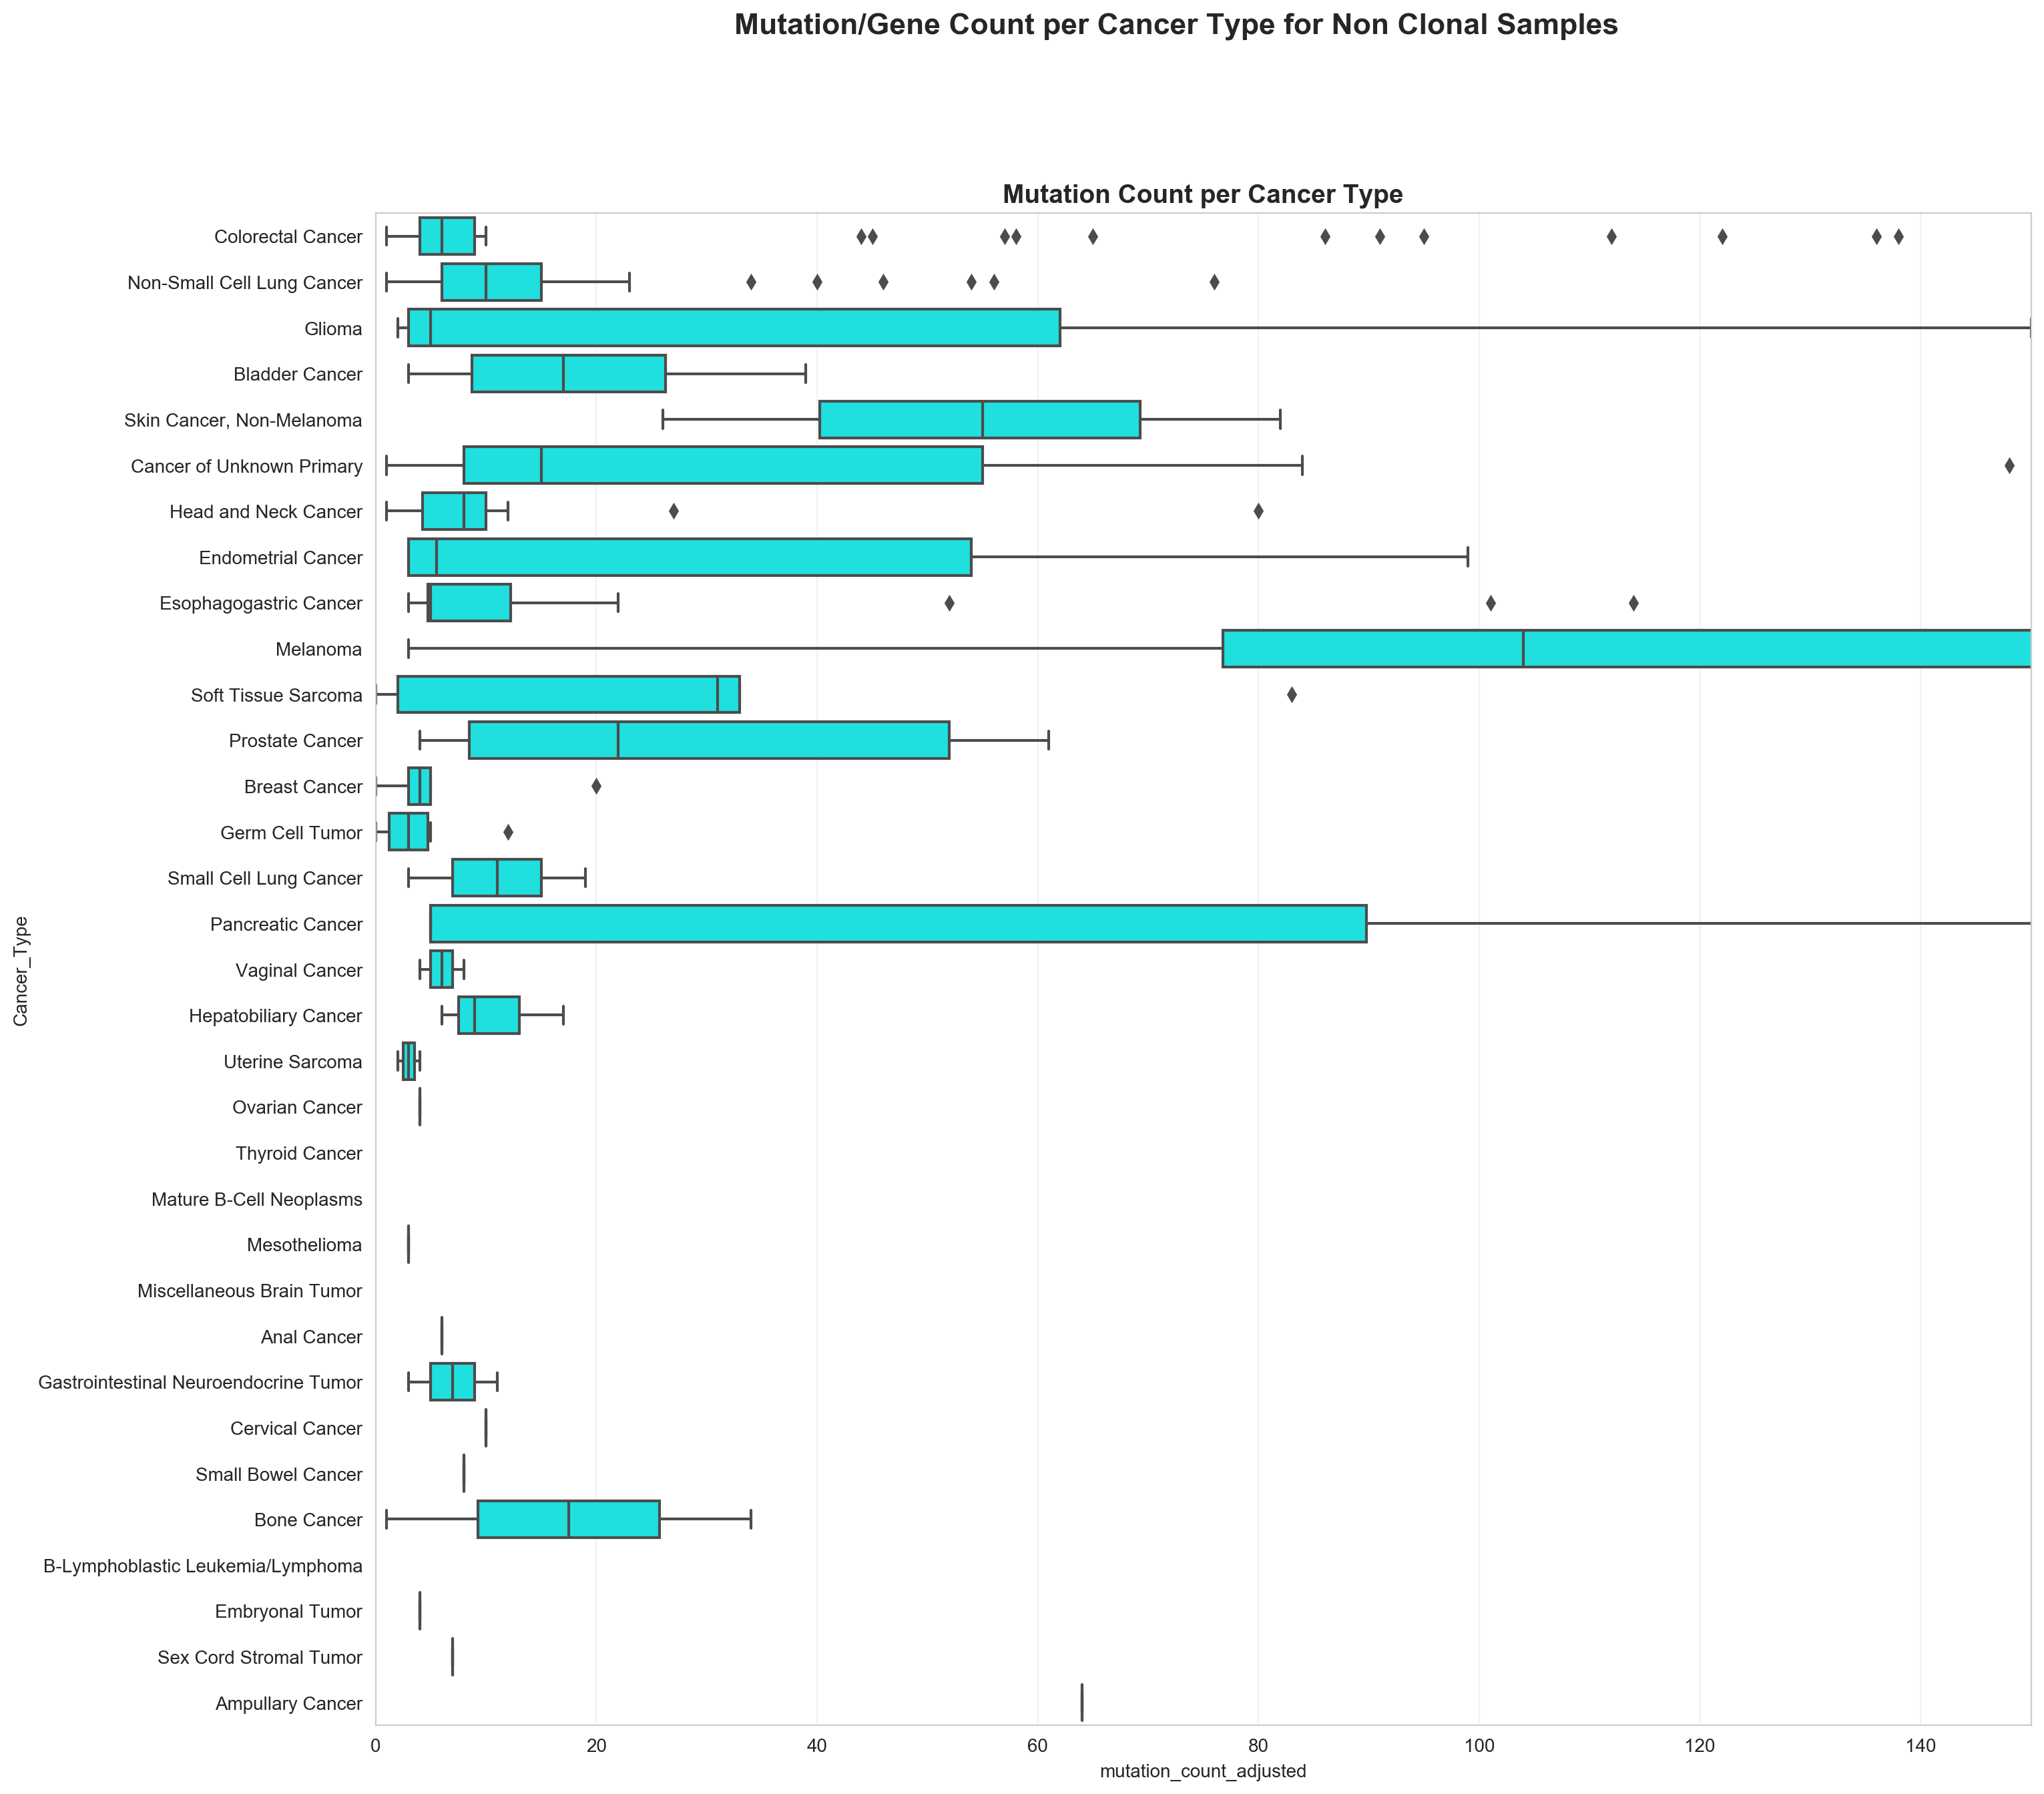

In [13]:
# For non clonal samples
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Mutation/Gene Count per Cancer Type for Non Clonal Samples',
             fontsize=16,
             weight='bold')
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
ax1.set_xlim(0, 150)

max_table_ccf_nc = max_table_ccf[max_table_ccf['clonality'].isin(
    ['intermediate', 'subclonal'])]

sns.boxplot(y="Cancer_Type",
            x="mutation_count_adjusted",
            data=max_table_ccf_nc,
            ax=ax1,
            dodge=False,
            color='cyan',
            order=count.index).set_title('Mutation Count per Cancer Type',
                                         weight='bold',
                                         fontsize=14)

## Subgroup Comparison per Cancer Type
Now we want to create a function that 

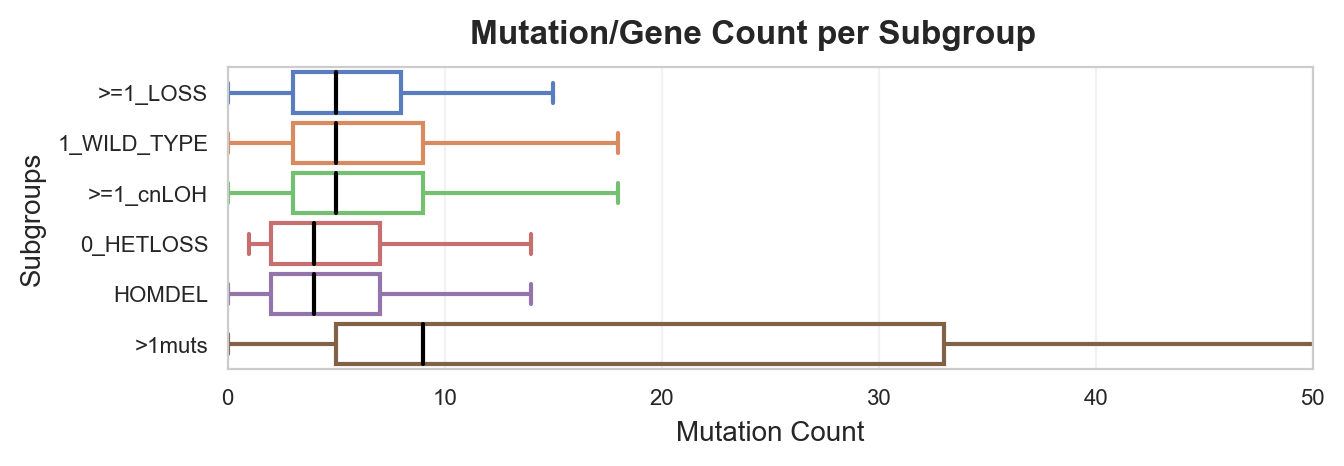

In [16]:
fig = plt.figure(figsize=(7, 2))
fig.suptitle('Mutation/Gene Count per Subgroup',
             fontsize=12,
             weight='bold',
             y=1.0)
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
ax1.set_xlim(0, 50)

my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))

data = master[[
    'tp53_count', 'tp53_group', 'mutation_count', 'gene_count', 'Sample_Type'
]]
data['mutation_count_adjusted'] = data['mutation_count'] - data['tp53_count']
ax1.tick_params(axis='both', which='major', labelsize=8)

sns.boxplot(y="tp53_group",
            x="mutation_count_adjusted",
            data=data,
            ax=ax1,
            dodge=False,
            palette=my_colors,
            order=[
                '>=1_LOSS', '1_WILD_TYPE', '>=1_cnLOH', '0_HETLOSS', 'HOMDEL',
                '>1muts'
            ]).set(xlabel='Mutation Count', ylabel='Subgroups')

for i, artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i * 6, i * 6 + 6):
        line = ax1.lines[j]
        if j % 6 == 4: line.set_color('black')
        else: line.set_color(col)
        line.set_mfc('None')
        line.set_mec('None')

plt.show()

In [17]:
def style(ax1):
    for i, artist in enumerate(ax1.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i * 6, i * 6 + 6):
            line = ax1.lines[j]
            if j % 6 == 4: line.set_color('black')
            else: line.set_color(col)
            line.set_mfc('None')
            line.set_mec('None')


def clonal_cond(x, thr_1, thr_2):
    if x.ccf_largest + x['ccf_2nd-largest'] > thr_1:
        return 'clonal'
    if x.ccf_largest + x['ccf_2nd-largest'] > thr_2:
        return 'intermediate'
    else:
        return 'subclonal'

In [19]:
# Master initialization for the Cancer_Type Study
data_ccf = master[['tp53_ccf_1', 'tp53_ccf_2', 'tp53_ccf_3', 'tp53_ccf_4', 'tp53_ccf_5']]
max_table_ccf = pd.DataFrame(np.sort(data_ccf.fillna(0).values)[:, -2:],
                             columns=['ccf_2nd-largest', 'ccf_largest'])
max_table_ccf = pd.concat([max_table_ccf, master.reset_index()], axis=1)

In [22]:
def plot_mut_count(cancer_type,
                   thr_1=None,
                   thr_2=None,
                   clonality='clonal',
                   xlim=50):
    # Figure initialization
    fig = plt.figure(figsize=(7, 2))
    fig.suptitle('Mutation Count for ' + cancer_type,
                 fontsize=12,
                 weight='bold',
                 y=1.13)
    ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
    ax1.set_title('Clonality thresholds: ' + '(' + str(thr_1) + ', ' +
                  str(thr_2) + ')',
                  fontsize=9,
                  pad=10)
    ax1.set_xlim(0, xlim)
    ax1.tick_params(axis='both', which='major', labelsize=8)
    my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
    my_colors_remixed = [
        my_colors[5], my_colors[0], my_colors[4], my_colors[2], my_colors[1],
        my_colors[3]
    ]
    data = max_table_ccf
    if thr_1:
        data['clonality'] = data.apply(clonal_cond,
                                       args=(thr_1, thr_2),
                                       axis=1)
        data = data[data['clonality'] == clonality]
    data['mutation_count_adjusted'] = data['mutation_count'] - data[
        'tp53_count']
    data_cancer = data[data['Cancer_Type'] == cancer_type]
    groupby = get_groupby(data_cancer, 'tp53_group', 'count')
    display(groupby)
    

    #We apply the style function
    sns.boxplot(y="tp53_group",
                x="mutation_count_adjusted",
                data=data_cancer,
                ax=ax1,
                dodge=False,
                palette=my_colors_remixed,
                order=[
                    '0_HETLOSS', '>=1_LOSS', '>=1_cnLOH', '1_WILD_TYPE',
                    'HOMDEL', '>1muts'
                ]).set(xlabel='Mutation Count', ylabel='Subgroups')
    
    ax1.set_yticklabels(['0_HETLOSS (' + str(int(groupby.loc['0_HETLOSS'])) + ')',
                         '>=1_LOSS ('+ str(int(groupby.loc['>=1_LOSS'])) + ')',
                         '>=1_cnLOH ('+ str(int(groupby.loc['>=1_cnLOH'])) + ')',
                         '1_WILD_TYPE ('+ str(int(groupby.loc['1_WILD_TYPE'])) + ')',
                        'HOMDEL ('+ str(int(groupby.loc['HOMDEL'])) + ')',
                         '>1muts ('+ str(int(groupby.loc['>1muts'])) + ')'], fontsize=10)
    
    style(ax1)

    plt.show()
    
def plot_mut_count_interact(cancer_type, xlim):
    return plot_mut_count(cancer_type, xlim=xlim)

interactive(children=(Dropdown(description='cancer_type', options=('Gastrointestinal Stromal Tumor', 'Tubular …

<function __main__.plot_mut_count_interact(cancer_type, xlim)>

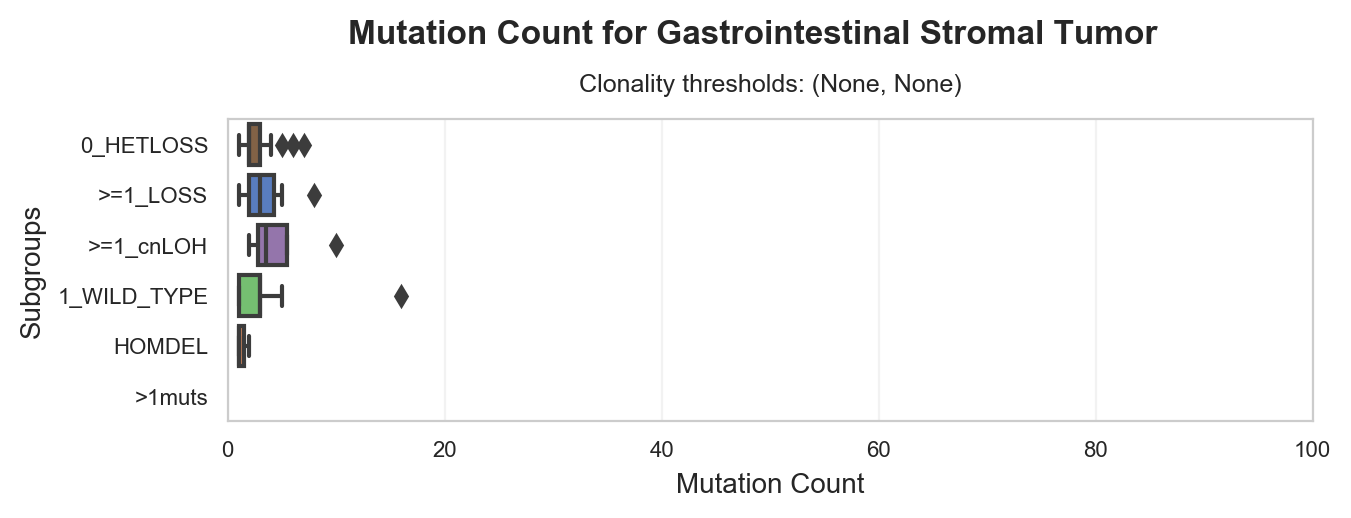

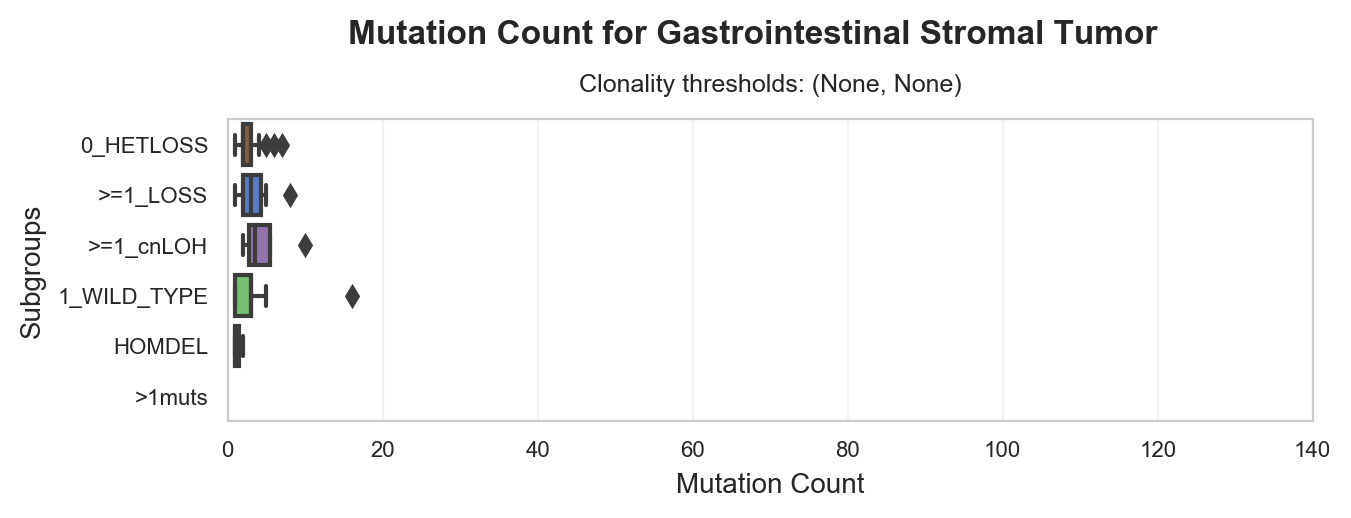

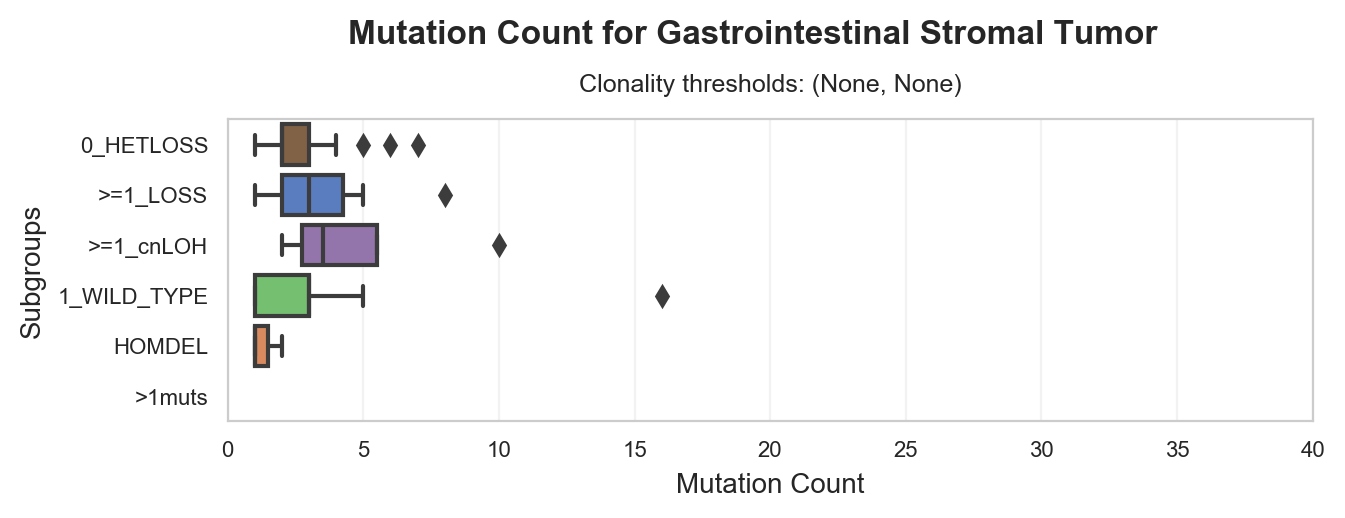

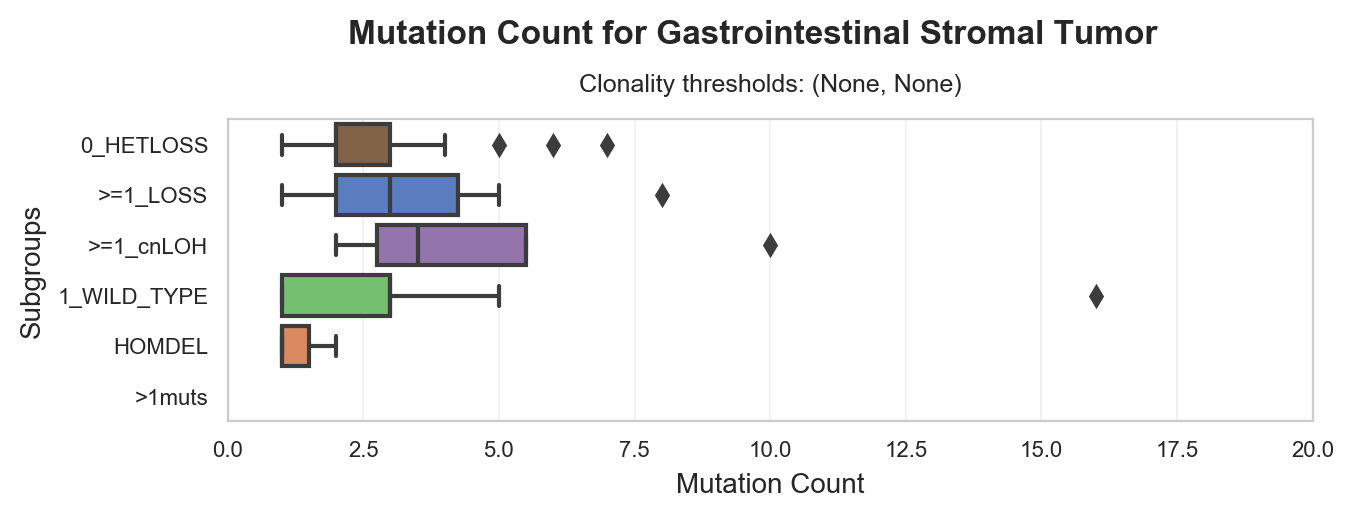

In [23]:
interactive_plot = interact_manual(plot_mut_count_interact,
                               cancer_type=list(set(
                                   max_table_ccf.Cancer_Type)), 
                               xlim=(10,200,10))

display(interactive_plot)

,count
tp53_group,
0_HETLOSS,156
1_WILD_TYPE,198
>1muts,116
>=1_LOSS,1361
>=1_cnLOH,281
HOMDEL,21


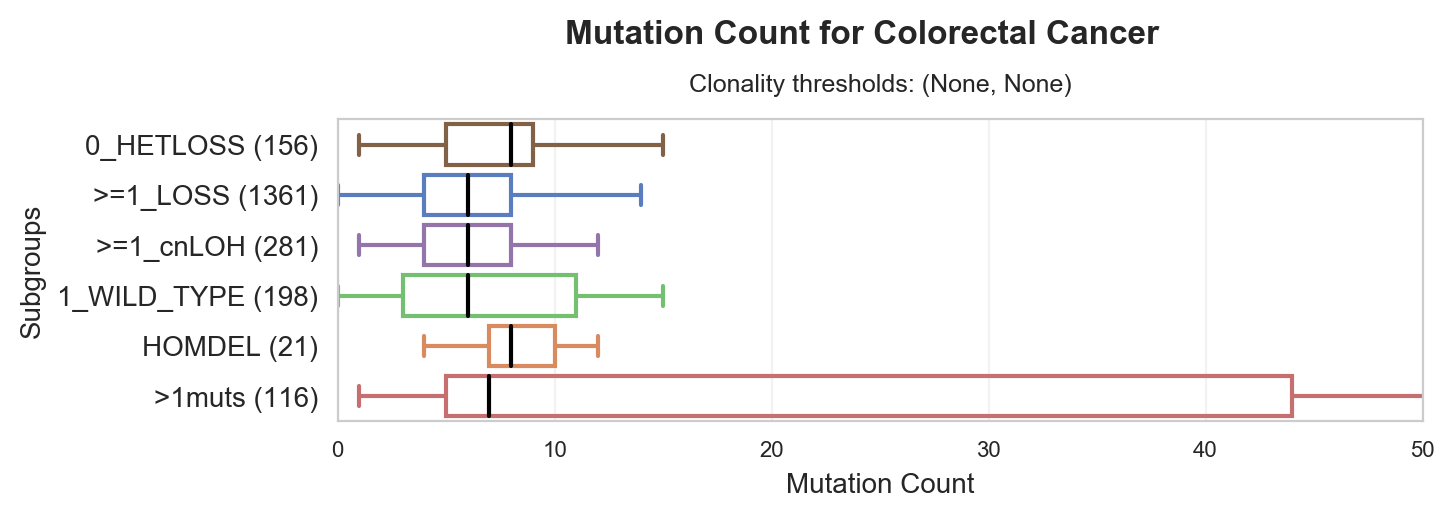

In [24]:
plot_mut_count(cancer_type='Colorectal Cancer',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=50)

,count
tp53_group,
0_HETLOSS,347
1_WILD_TYPE,322
>1muts,110
>=1_LOSS,1158
>=1_cnLOH,348
HOMDEL,23


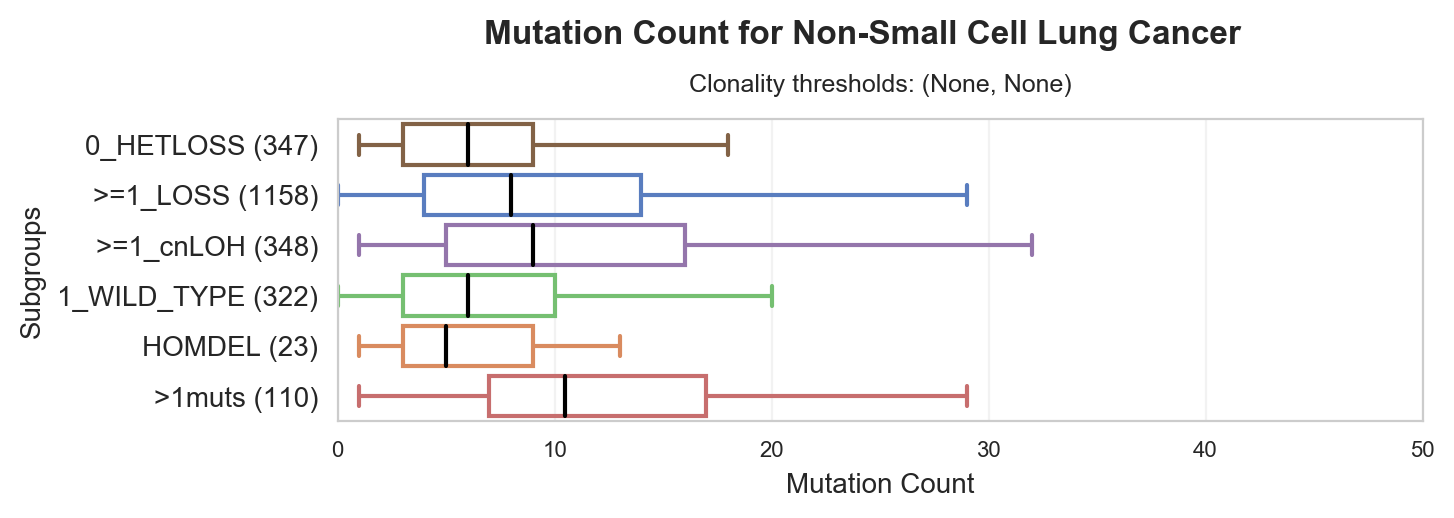

In [25]:
plot_mut_count(cancer_type='Non-Small Cell Lung Cancer',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=50)

,count
tp53_group,
0_HETLOSS,48
1_WILD_TYPE,88
>1muts,101
>=1_LOSS,104
>=1_cnLOH,154
HOMDEL,12


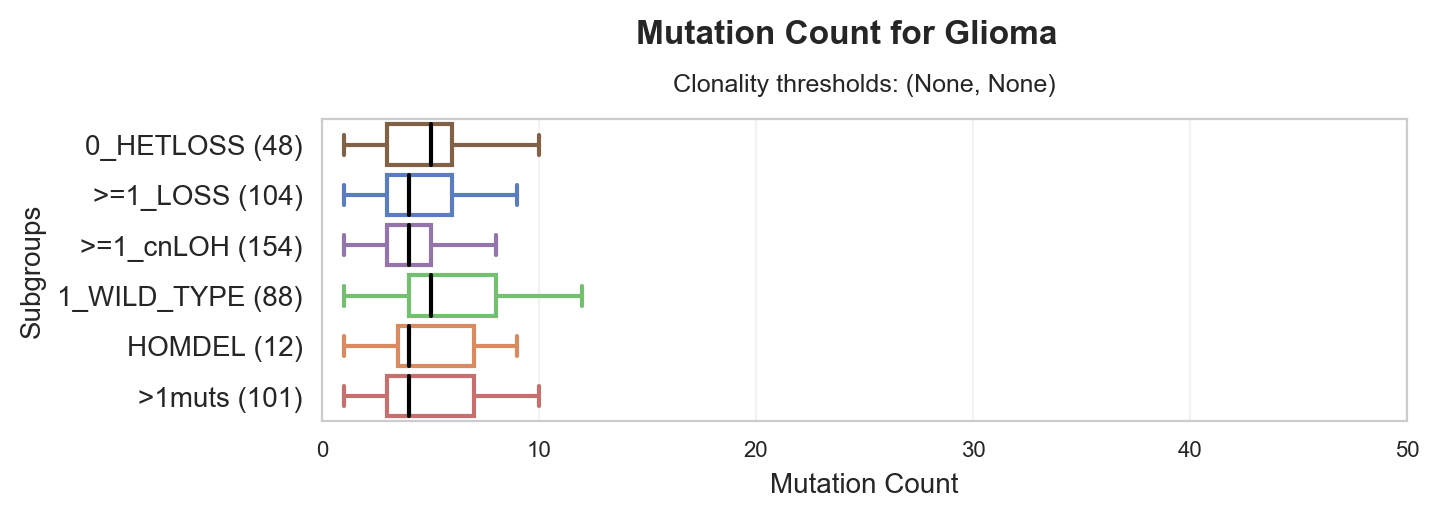

In [26]:
plot_mut_count(cancer_type='Glioma',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=50)

,count
tp53_group,
0_HETLOSS,17
1_WILD_TYPE,15
>1muts,44
>=1_LOSS,32
>=1_cnLOH,12
HOMDEL,4


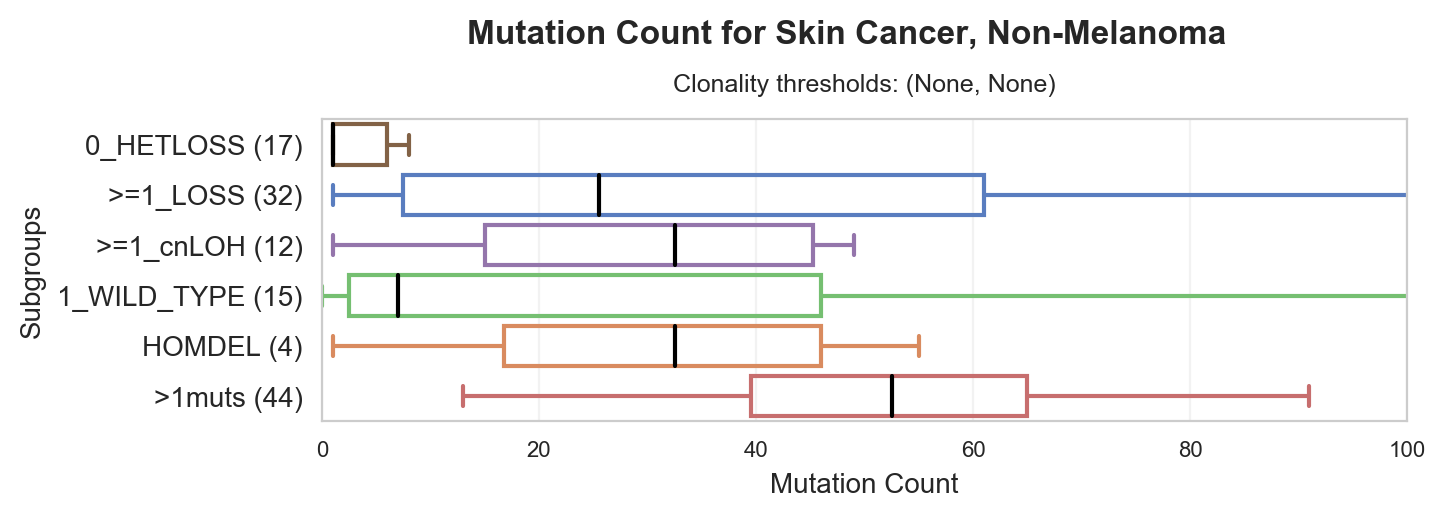

In [27]:
plot_mut_count(cancer_type='Skin Cancer, Non-Melanoma',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=100)

,count
tp53_group,
0_HETLOSS,131
1_WILD_TYPE,26
>1muts,18
>=1_LOSS,98
>=1_cnLOH,30
HOMDEL,7


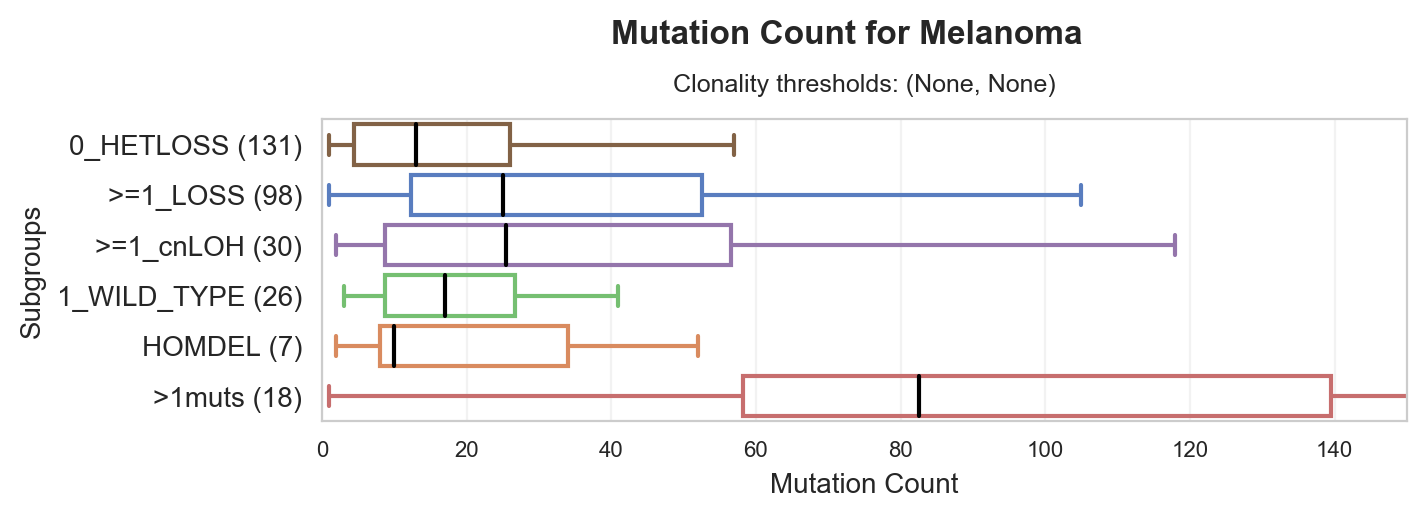

In [28]:
plot_mut_count(cancer_type='Melanoma',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=150)

,count
tp53_group,
0_HETLOSS,864
1_WILD_TYPE,106
>1muts,9
>=1_LOSS,1005
>=1_cnLOH,237
HOMDEL,41


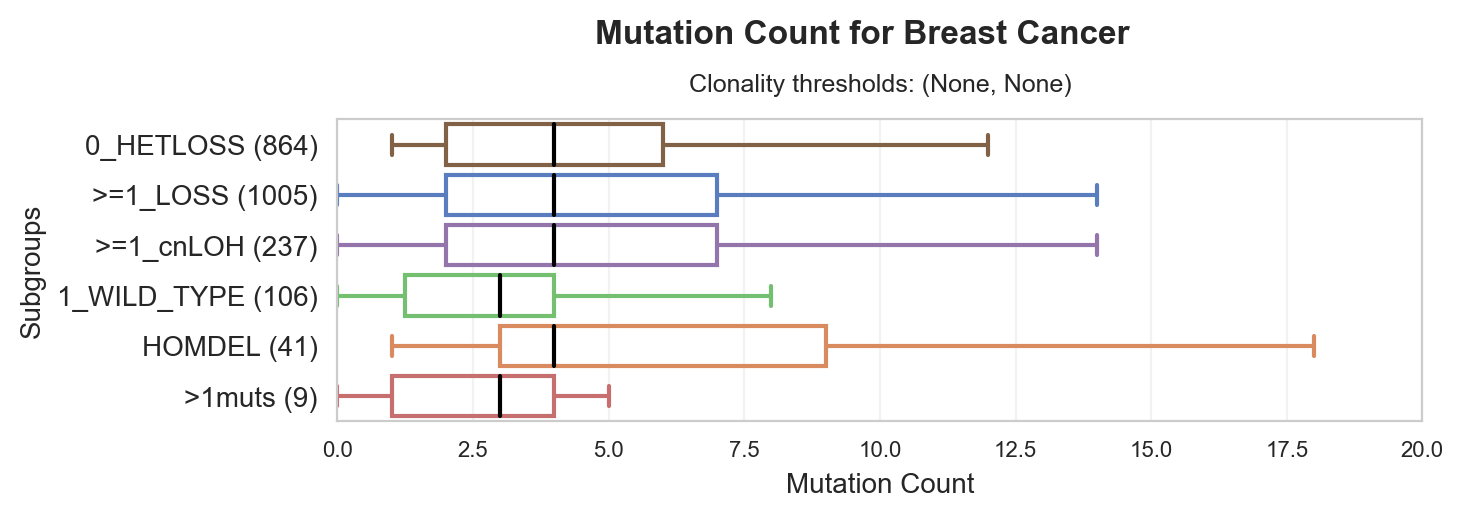

In [29]:
plot_mut_count(cancer_type='Breast Cancer',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=20)

,count
tp53_group,
0_HETLOSS,42
1_WILD_TYPE,24
>1muts,39
>=1_LOSS,43
>=1_cnLOH,40
HOMDEL,5


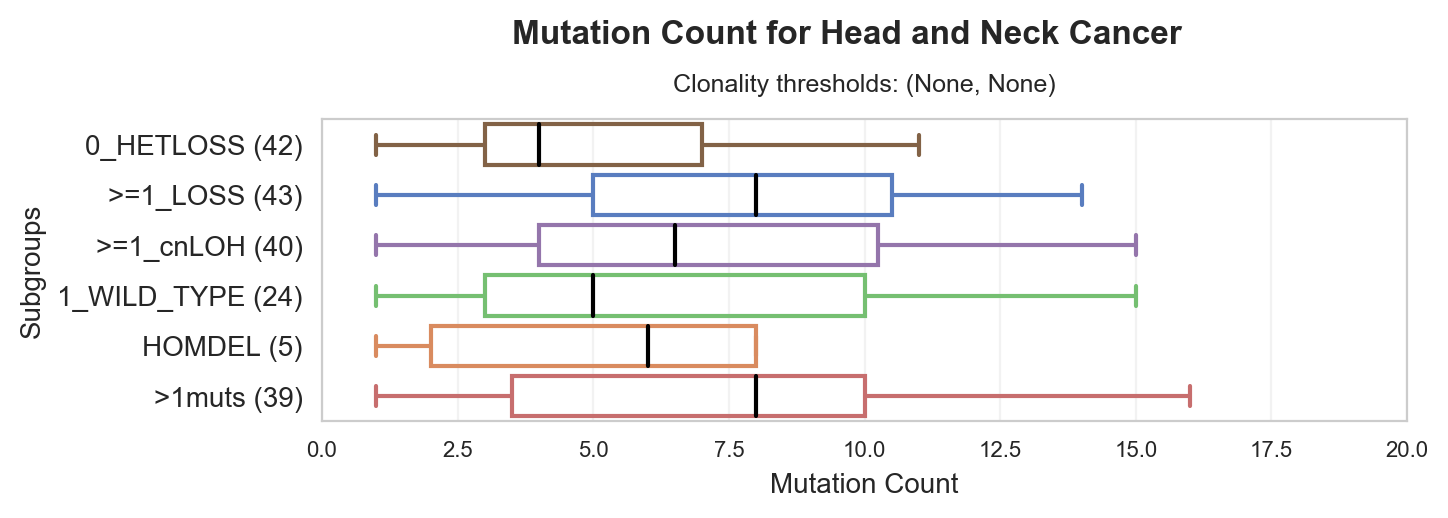

In [30]:
plot_mut_count(cancer_type='Head and Neck Cancer',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=20)

,count
tp53_group,
0_HETLOSS,254
1_WILD_TYPE,52
>1muts,14
>=1_LOSS,307
>=1_cnLOH,30
HOMDEL,34


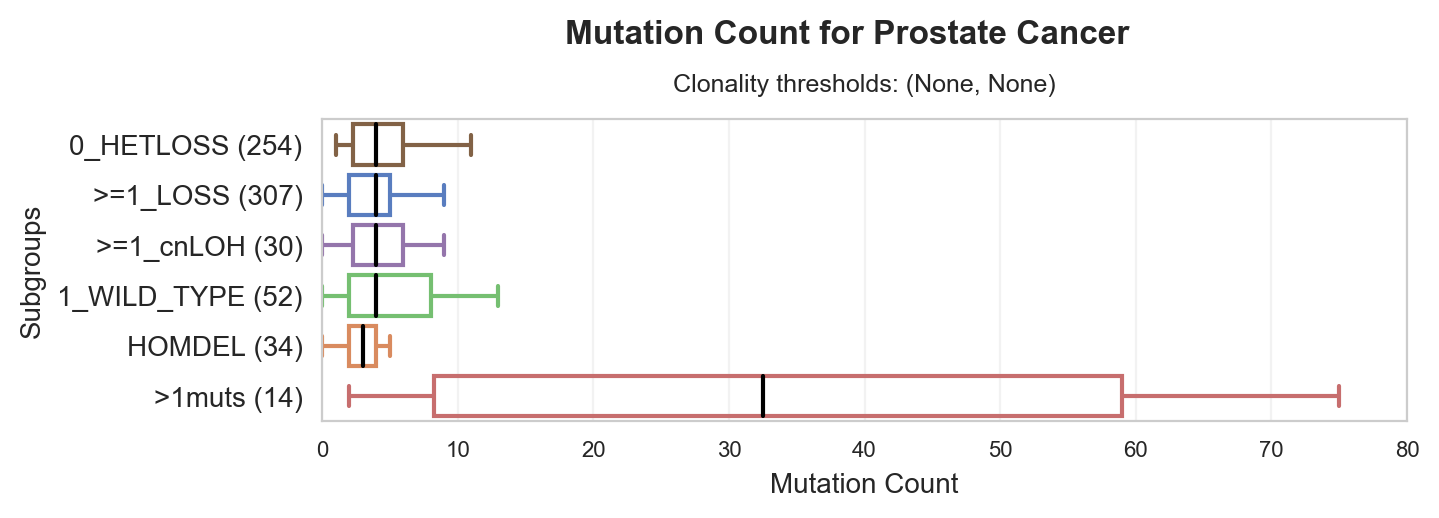

In [31]:
plot_mut_count(cancer_type='Prostate Cancer',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=80)

,count
tp53_group,
0_HETLOSS,95
1_WILD_TYPE,54
>1muts,60
>=1_LOSS,173
>=1_cnLOH,78
HOMDEL,9


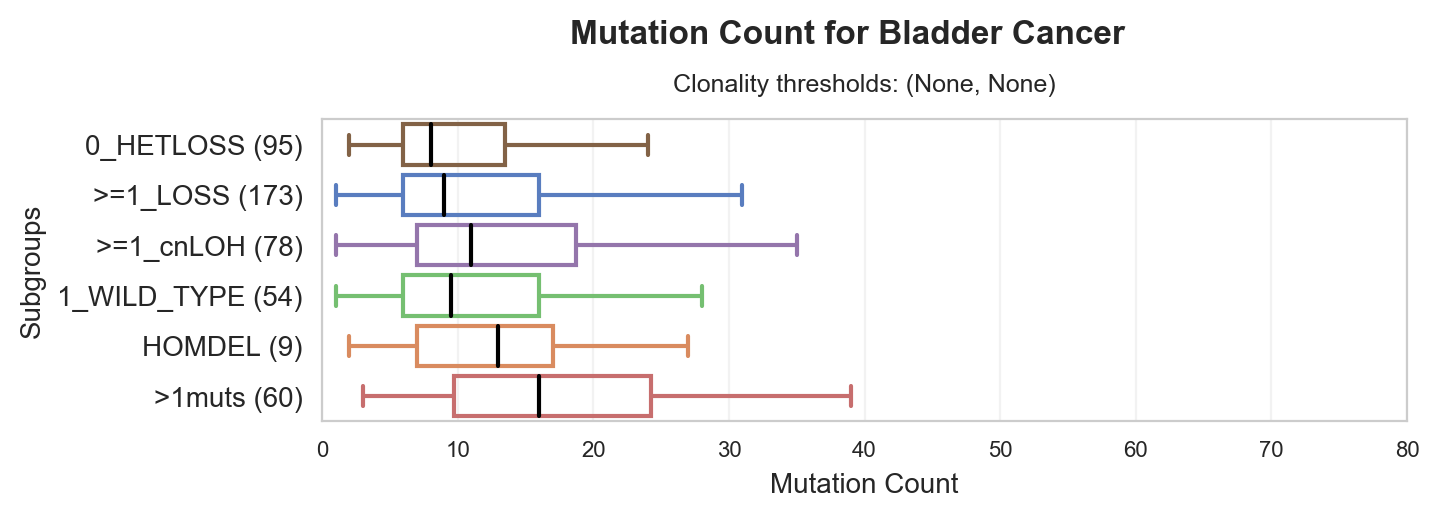

In [32]:
plot_mut_count(cancer_type='Bladder Cancer',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=80)

,count
tp53_group,
0_HETLOSS,76
1_WILD_TYPE,16
>1muts,14
>=1_LOSS,117
>=1_cnLOH,34
HOMDEL,47


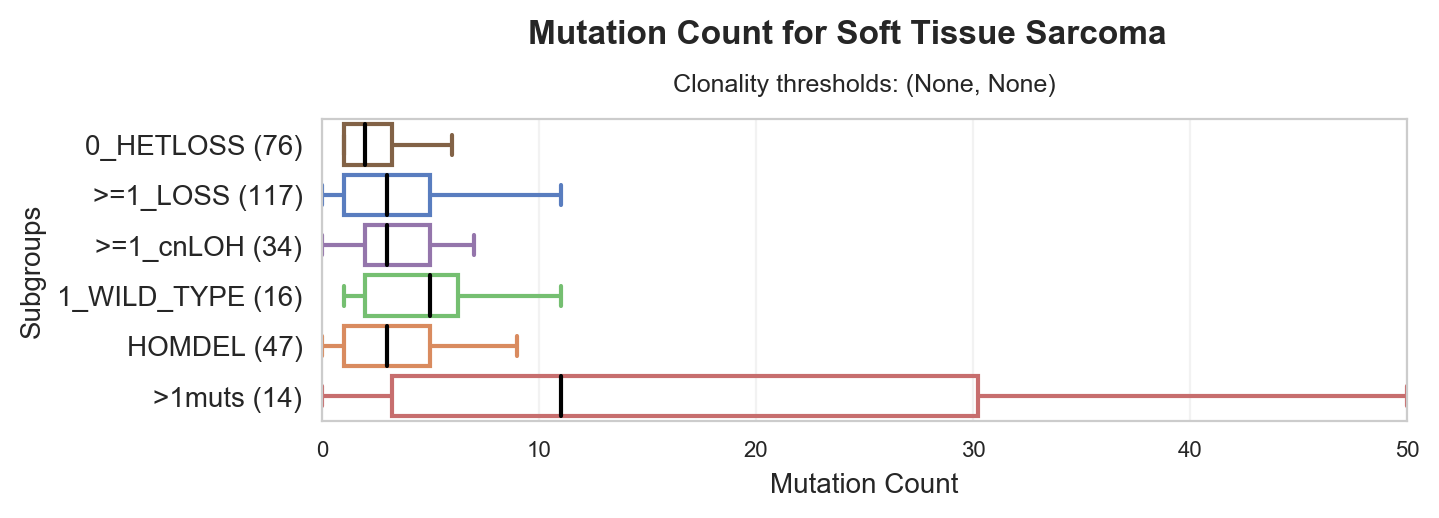

In [33]:
plot_mut_count(cancer_type='Soft Tissue Sarcoma',
               thr_1=None,
               thr_2=None,
               clonality=None,
               xlim=50)